# 第７章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

# 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

/Users/kimuramayuko/opt/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

# 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [6]:
model.similarity('United_States', 'U.S.')

0.73107743

# 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [7]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

# 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [8]:
model.most_similar(positive=['Spain','Athens'], negative=['Madrid'],topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

# 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [11]:
from tqdm import tqdm
with open('questions-words.txt', 'r') as f1, open('64.txt', 'w') as f2:
    for line in tqdm(f1):  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
        line = line.split()
        if line[0] == ':':
            category = line[1]
        else:
            word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

19558it [1:46:52,  3.05it/s]


# 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [12]:
with open('64.txt', 'r') as f:
    sem_cnt = 0
    sem_cor = 0
    syn_cnt = 0
    syn_cor = 0
    for line in f:
        line = line.split()
        if not line[0].startswith('gram'):
            sem_cnt += 1
            if line[4] == line[5]:
                sem_cor += 1
        else:
            syn_cnt += 1
            if line[4] == line[5]:
                syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}') 

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


# 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [3]:
!head -10 'wordsim353/combined.csv'

In [5]:
ws353 = []
with open('wordsim353/combined.csv', 'r') as f:
    next(f)
    for line in f:  
        line = [s.strip() for s in line.split(',')]
        line.append(model.similarity(line[0], line[1]))
        ws353.append(line)

for i in range(5):
    print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [6]:
import numpy as np
from scipy.stats import spearmanr

human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v) #スピアマン相関係数の計算

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685


# 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [18]:
from sklearn.cluster import KMeans
with open('country.txt','r') as f:
    countries = f.read().splitlines()
ng = 0
vec = []
target_countries = []

for c in countries:
    c = c.replace(' ','_').replace('_&_','_')
    try:        
        vec.append(model[c])
        target_countries.append(c)
    except:
        ng += 1
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(vec)

for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Azerbaijan, Bangladesh, Belgium, Czech Republic, Eritrea, Germany, Grenada, Iraq, Jamaica, Liechtenstein, Macedonia, Malawi, Maldives, Moldova, Montenegro, Netherlands, Papua New Guinea, Paraguay, Peru, Russian Federation, Samoa, Sri Lanka, Sudan, Switzerland, Trinidad & Tobago
cluster 1
Albania, Andorra, Argentina, Australia, Austria, Barbados, Belarus, Bolivia, Brunei, Congo, Costa Rica, Croatia, Cuba, El Salvador, Estonia, Ethiopia, France, Gabon, Georgia, Guinea-Bissau, Guyana, Indonesia, Italy, Japan, Kiribati, Kyrgyzstan, Laos, Latvia, Lebanon, Luxembourg, Mali, Malta, Mauritania, Mongolia, Namibia, Norway, Oman, Palau, Philippines, Romania, St Lucia, Saint Vincent & the Grenadines, Saudi Arabia, Singapore, Slovakia, Swaziland, Taiwan
cluster 2
Antigua & Deps, Bhutan, Botswana, Central African Rep, Chile, Comoros, Congo {Democratic Rep}, Denmark, Dominica, East Timor, Ghana, Guatemala, Guinea, Malaysia, Morocco, New Zealand, Nicaragua, Niger, Seychelles, Togo, Tunisia
c

# 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

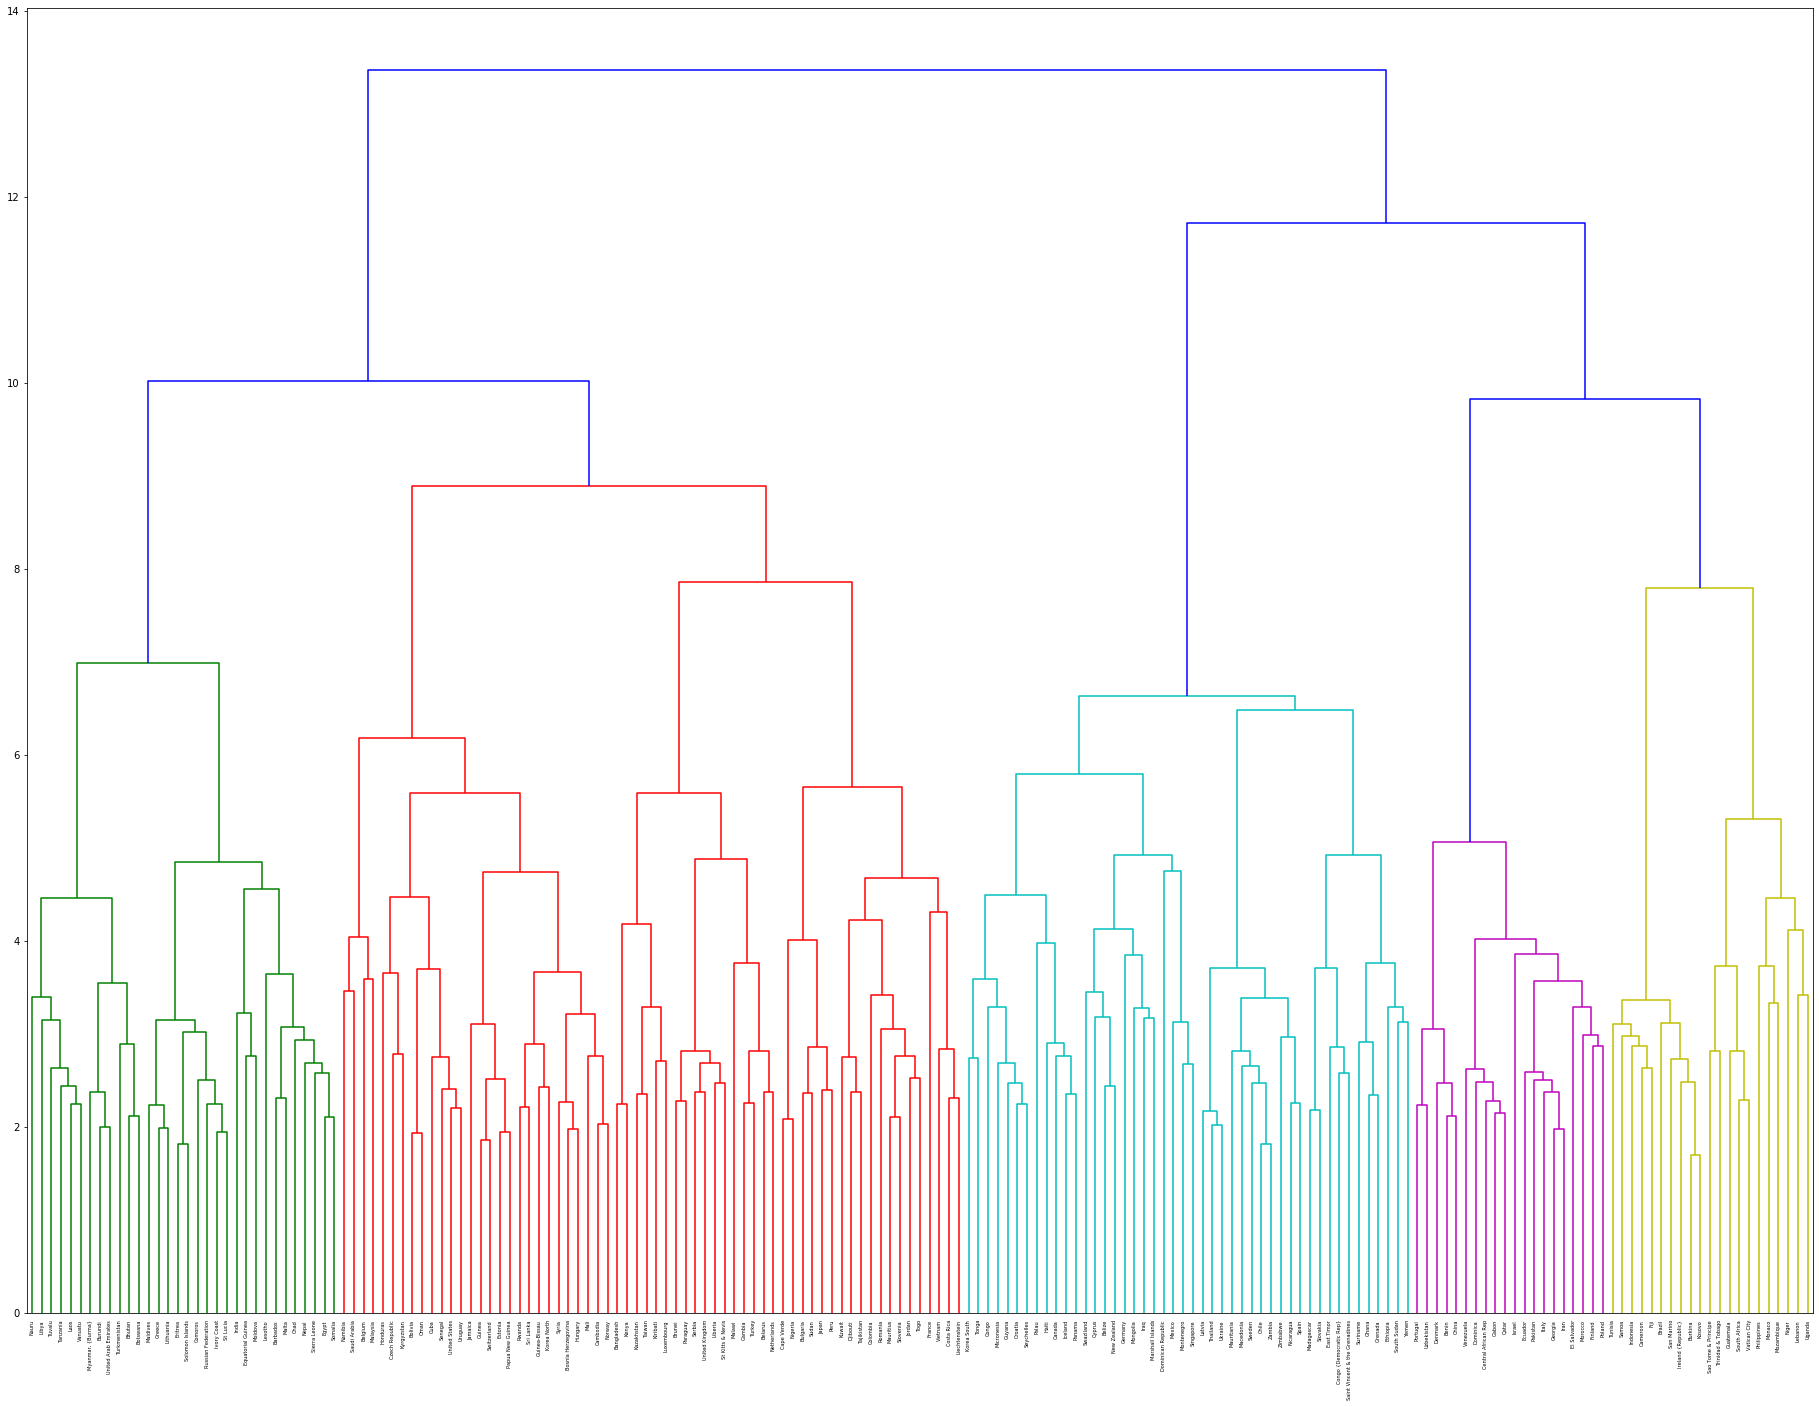

In [24]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(32, 24))
Z = linkage(vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

# 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

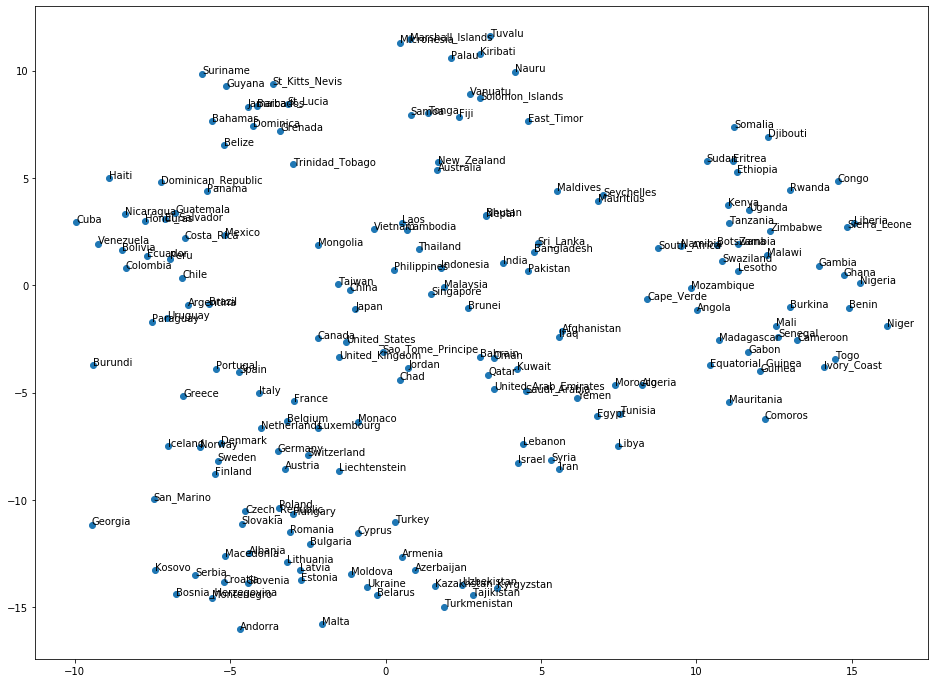

In [25]:
from sklearn.manifold import TSNE

vec_embedded = TSNE(n_components=2).fit_transform(vec)
vec_embedded_t = list(zip(*vec_embedded)) 
fig, ax = plt.subplots(figsize=(16, 12))
plt.scatter(*vec_embedded_t)
for i, c in enumerate(target_countries):
    ax.annotate(c, (vec_embedded[i][0],vec_embedded[i][1]))